# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [100]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [101]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 데이터 확인

In [102]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


불분명한 Column은 제거. (0번 인덱스 Column)

In [103]:
data = data.drop(columns=['Unnamed: 0'])

또한, 마일리지, 파워, 엔진데이터에 있는 단위값을 제거하여 실수형으로 전환(정규식 활용) 및 결측치 제거. 

In [104]:
import re

unit_regex = re.compile("(\s{1}(km/kg|kmpl|bhp|CC)$)")
target_column = ['Mileage', 'Engine', 'Power']

# 단위 없애주기.
for _col in target_column:
    data[_col] = data[_col].replace(unit_regex, '')

# 바로 단위를 바꾸려니 안돼서, Power Column에 Null 데이터 삭제
data.drop(data[data['Power'] == 'null'].index, inplace=True)

# 타입 변경
for _col in target_column:
    data[_col] = data[_col].astype('float')
    
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5.912000e+03,5910.000000,5876.000000,5876.000000,5874.000000,5912.000000
mean,2013.450609,5.837766e+04,18.232195,1625.466133,113.253050,5.283623,9.584919
std,3.188638,9.189848e+04,4.432320,601.787379,53.874957,0.804961,11.233694
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.286250e+04,18.200000,1495.500000,97.700000,5.000000,5.700000
75%,2016.000000,7.245375e+04,21.100000,1991.000000,138.100000,5.000000,10.012500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


결측치 확인

In [105]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5088
Price                   0
dtype: int64

너무 많은 결측치를 포함하고있는 New_Price행의 경우 삭제.

그 외, Mileage부터 Engine, Power, Seats 순으로 결측치 확인

In [106]:
data = data.drop(columns=['New_Price'])

In [107]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


Mileage feature는 Car Company와 연관이 있는 데이터이므로,

Name에서 Company_Name을 추출한 후, 해당 Company의 자동차들의 평균 Mileage값으로 대체.

In [108]:
# Column으로 추가.
data['Company_Name'] = data['Name'].str.split(' ').str[0]

In [109]:
# 평균값 추출
mahindra_mileage_mean = data[data['Company_Name'] == 'Mahindra']['Mileage'].mean()
toyota_mileage_mean = data[data['Company_Name'] == 'Toyota']['Mileage'].mean()

In [110]:
# Index로 접근해서 결측치 대체
data['Mileage'].loc[4446] = mahindra_mileage_mean
data['Mileage'].loc[4904] = toyota_mileage_mean

In [112]:
data['Mileage'].isnull().sum()

0

In [113]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [114]:
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [115]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60,Ford
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70,Honda


2개의 데이터 제외, Engine & Power & Seats는 모두가 NaN경우 밖에 없었다.

해당 결측치 모두 제거.

In [116]:
data.dropna(subset=['Engine', 'Power', 'Seats'], inplace=True)

In [117]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company_Name         0
dtype: int64

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
 12  Company_Name       5874 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 642.5+ KB


## 데이터 경향 분석

In [128]:
# Column 별로 데이터의 분포를 확인하기 위해, 평균가격을 기준으로 정렬.
# 회사에 따라 가격순 정렬
data.groupby('Company_Name').mean().sort_values(by="Price", ascending=False).head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Company_Name,,,,,,,
Lamborghini,2011.000000,6500.000000,6.400000,5204.000000,560.000000,2.000000,120.000000
Bentley,2006.000000,48000.000000,8.600000,5998.000000,552.000000,4.000000,59.000000
Porsche,2013.562500,43927.625000,14.080000,3485.125000,331.287500,4.312500,49.204375
Land,2014.421053,59527.403509,11.535965,2475.719298,189.602105,5.403509,39.861053
Jaguar,2014.400000,36380.725000,14.955750,2623.150000,239.075250,4.850000,37.632250
Mercedes-Benz,2013.598101,48445.648734,13.884747,2373.674051,193.579873,5.044304,26.917848
Mini,2015.076923,24890.307692,18.593846,1766.615385,147.438462,4.423077,26.896923
Audi,2013.621277,52879.289362,15.191660,2277.863830,192.106043,5.285106,25.569787
BMW,2013.083969,79471.381679,16.961260,2323.221374,209.819847,4.954198,25.439618


In [129]:
# 연식에 따라 가격순 정렬
data.groupby('Year').mean().sort_values(by="Price", ascending=False).head(10)

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,,,,,,
2019,20019.647059,17.834510,1728.862745,125.320686,5.450980,19.464118
2018,24128.248322,19.314228,1566.140940,115.156879,5.184564,15.726141
2017,44774.100683,19.419044,1556.146758,111.652969,5.310580,13.781724
2016,43312.863144,19.634484,1537.769648,109.547683,5.287263,11.740583
2015,53046.528378,19.220770,1613.574324,112.641324,5.286486,11.249068
2014,56604.102015,18.857418,1616.593199,113.634798,5.311083,9.640919
2013,64754.143975,18.438435,1641.369327,114.401440,5.289515,8.751346
2012,69203.574733,18.155356,1644.379004,111.908096,5.295374,7.353310
2011,69364.865342,16.874055,1709.891832,119.962340,5.273731,6.828079


Column 마다 값의 범위가 매우 다르므로, 표준화 필요. (log를 취할 예정)

또한, 오래된 기종의 경우 가격인 낮은 경향을 보인다는 점도 확인함.

## 연속형 변수간 상관관계 확인

['log_Kilometers_Driven', 'log_Engine', 'log_Power', 'log_Price']


<AxesSubplot: >

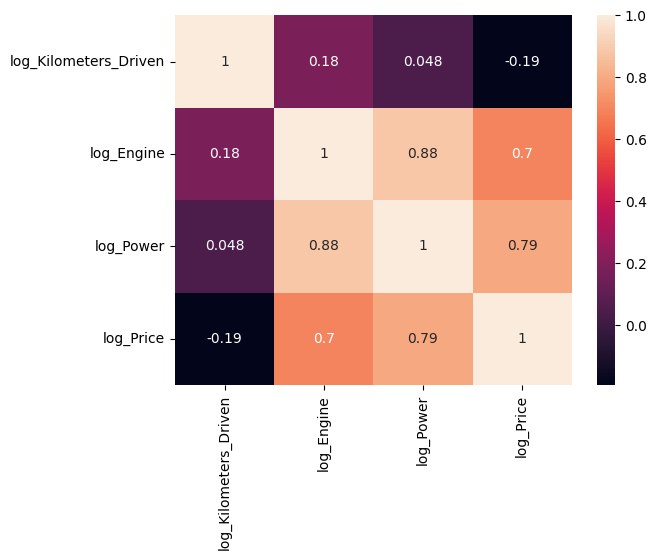

In [133]:
# Mileage 제외, 모두 log를 취한 뒤 상관관계 파악.
normalize_target = ['Kilometers_Driven', 'Engine', 'Power', 'Price']

for _col in normalize_target:
    new_log_column = 'log_' + _col
    data[new_log_column] = data[_col].map(lambda x : np.log(x))
    
log_normalized_target = [ 'log_' + _col for _col in normalize_target ]

print(log_normalized_target)
sns.heatmap(data= data[log_normalized_target].corr(), annot=True)

예상했던 Kilometer_Driven이 아닌, Engine 및 Power가 Price와 높은 상관도를 보임.

하지만 Engine, Power 역시 서로의 높은 상관도를 보임.

In [140]:
# OLS로 분석 진행
from statsmodels.formula.api import ols
import statsmodels.api as sm

Y = data[['log_Price']]
X = sm.add_constant(data[log_normalized_target])

multi_model = sm.OLS(Y, X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.347e+30
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:19:10   Log-Likelihood:             1.7942e+05
No. Observations:                5874   AIC:                        -3.588e+05
Df Residuals:                    5869   BIC:                        -3.588e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.474e-15   5.08e-15     -0.487      0.626   -1.24e-14    7.48e-15
log_Kilometers_Driven  5.542e-16   2.72e-16      2.034      0.042       2e-17    1.09e-15
log_Engine             4.231e-16   1.14e-15      0.371      0.710   -1.81e-15    2.66e-15
log_Power              1.633e-15   1.04e-15      1.576      0.115   -3.98e-16    3.66e-15
log_Price                 1.0000   3.53e-16   2.83e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      140.411   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.120
Skew:                           0.232   Prob(JB):                     3.55e-49
Kurtosis:                       3.835   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""